<a href="https://colab.research.google.com/github/Gauravhulmukh/All_ml_algorithm_from_scratch/blob/master/Linear%20Regression/Multiple_Linear_Regression_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression using Gradient Descent**<br>
It is same as Simple LR but input contain multiple variables.<br>
**Algorithm** :
1.   Prepare data (x_train,x_test,y_train,y_test)<br>
2.   Define Hypothesis:<br> 
       **h(x) =theta0 + theta1 * X** &nbsp; or **= theta<sup>T</sup>X**
3. Cost Function : J(theta0,theta1) formula mentioned in image
4. Compute Gradients : Derivaties formula mentioned in image
5. Gradient Descent : (x,y,iterations,learning_rate)<br>
      Define cost_history Array<br>
      Initialize random theta_coeff<br>
      compute_gradients wrt theta_coeff<br>
      Update theta_coeff<br>
      Calculate new cost and Store<br>
6.Prediction: Set value of learning_rate<br>
  Define Bias variable<br>
  Use Hypothesis with new_inputs<br>
![alt text](http://mccormickml.com/assets/GradientDescent/GradientDescentOfMSETable.png)

7. Calculate RMSE and R2_Score:<br>
![alt text](https://github.com/Gauravhulmukh/programming-foundation-with-python-from-udacity/blob/master/rmser2score.PNG?raw=true)




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
x= train_data[['a','b']].values
y= train_data['y'].values
x_test= test_data[['a','b']].values
y_test= test_data['y'].values

In [0]:
def hypothesis(theta_coeff,x):
  '''
  parameters:
  theta_coeff (array)= coefficient of function (1 X num_of_theta_coeff)
  x = input data/variables (num_of_samples X 1)

  return:
  predicted values for each example rows in inputs (1 X num_of_inputs)
  '''
  return x.dot(theta_coeff)

In [0]:
def cost_function_mse(theta_coeff, x, y):
  '''
  parameters:
  theta_coeff (array)= coefficient of function (1 X num_of_theta_coeff)
  x = input data/variables (num_of_samples X 1)
  y = input data/variables (num_of_samples X 1)

  return:
  Computes cost of using theta_coeff as coefficients for Linear Representation wrt to training data
  '''
  predicted_y = hypothesis(theta_coeff,x)
  return np.sum((predicted_y - y)** 2) / (2*len(x))

In [0]:
def compute_gradients(theta_coeff, x, y):
  '''
  parameters:
  theta_coeff (array)= coefficient of function (1 X num_of_theta_coeff)
  x = input data/variables (num_of_samples X 1)
  y = input data/variables (num_of_samples X 1)

  return:
  Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
  '''
  predicted_y = hypothesis(theta_coeff,x)
  coeff_gradients = np.sum((predicted_y - y) * x.T,axis=1) /(len(x))
  return coeff_gradients

In [0]:
def gradient_descent(x, y, iterations, learning_rate):
  '''
  parameters:
  x = input data/variables (num_of_samples X 1)
  y = input data/variables (num_of_samples X 1)
  iterations(int) = number of iterations/epochs
  learning_rate(int): alpha or learning rate which controls the descent 

  return:
  Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
  '''
  # Container to cost history as the descent progresses
  cost_history = []
  theta_coeff = np.array([0] * x.shape[1])
  for iteration in range(iterations):
        # Compute gradient wrt. old theta_coeff
        coeff_gradients = compute_gradients(theta_coeff, x, y)
        #update theta_coeff
        theta_coeff = theta_coeff - (learning_rate * coeff_gradients)
        #store the new cost
        cost = cost_function_mse(theta_coeff, x, y)
        cost_history.append(cost)
  return theta_coeff, cost_history

In [0]:
alpha = 0.0001 #learning_rate
bias_variable = np.ones(len(x))#bias variables
x_train = np.column_stack([bias_variable, x])

In [0]:
best_theta_coeff, cost_history = gradient_descent(x_train, y, 25000, alpha)

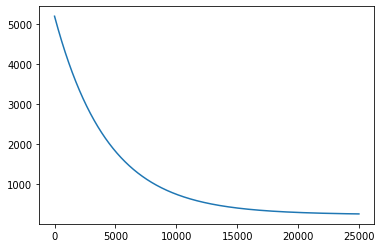

In [12]:
cost_history[-1]
plt.plot(cost_history)

In [0]:
def get_predictions(theta_coeff, x_input):
  bias_variable = np.ones(len(x_input))#bias variables
  new_x_input = np.column_stack([bias_variable, x_input])# Plug input along with bias_variable
  preds = hypothesis(theta_coeff, new_x_input)# Compute output values with new coefficients
  return preds

In [0]:
def rmse(y, y_pred):
  rmse = np.sqrt(np.sum((y-y_pred)**2)/len(y))
  return rmse

In [0]:
def r2_score(y, y_pred):
  mean_y =np.mean(y)
  SE_line_variation = np.sum((y - y_pred)** 2) #Unexplained variation in y wrt -> fitted line
  SE_total_variation = np.sum((y - mean_y)** 2) #Unexplained max possible variation in y wrt->Mean
  return 1 - (SE_line_variation/SE_total_variation)

In [0]:
y_pred_train = get_predictions(best_theta_coeff, x)
y_pred_test = get_predictions(best_theta_coeff, x_test)

In [17]:
#Training set evaluation
print(f"RMSE= {rmse(y, y_pred_train)}")
print(f"R2_score = {r2_score(y, y_pred_train)}")

RMSE= 22.453806036297763
R2_score = 0.9509160548529371


In [18]:
#Testing set evaluation
print(f"RMSE= {rmse(test_data['y'].values, y_pred_test)}")
print(f"R2_score = {r2_score(test_data['y'].values, y_pred_test)}")

RMSE= 24.092565600210925
R2_score = 0.948641853549524
